# Import Necessary Libraries
* matplotlib.pyplot Library: Visualizes points and hulls for correctness, comparison, and presentation.
* random Library:Generates test datasets for benchmarking algorithms.
* math library: Perform geometric computations.
* time Library: Measure the execution time of Convex Hull algorithms for performance comparison.

In [1]:
import matplotlib.pyplot as plt
import random
import math
import time

# Convex Hull using Graham Scan implementation
Steps
* Find the point with the lowest y-coordinate, break ties by x-coordinate
* Compute the polar angle with respect to the starting point
* Sort points by polar angle and distance from the starting point
* Initialize the convex hull with the first two points
* Use a stack to build the convex hull

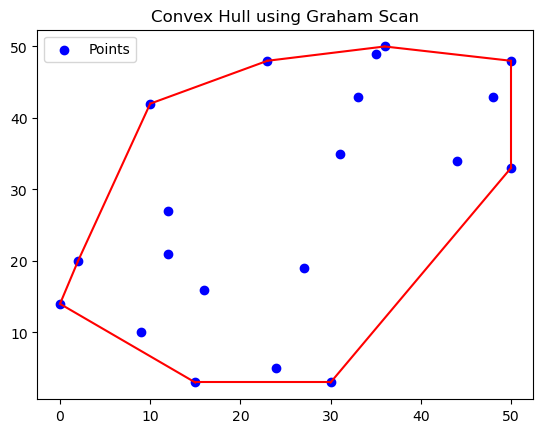

In [2]:
def graham_scan(points):
    # Find the point with the lowest y-coordinate, break ties by x-coordinate
    start = min(points, key=lambda p: (p[1], p[0]))
    
    # Compute the polar angle with respect to the starting point
    def polar_angle(p):
        return math.atan2(p[1] - start[1], p[0] - start[0])
    
    # Sort points by polar angle and distance from the starting point
    points = sorted(points, key=lambda p: (polar_angle(p), (p[0] - start[0])**2 + (p[1] - start[1])**2))
    
    # Initialize the convex hull with the first two points
    hull = [points[0], points[1]]
    
    # Use a stack to build the convex hull
    for point in points[2:]:
        while len(hull) >= 2 and cross_product(hull[-2], hull[-1], point) <= 0:
            hull.pop()  # Remove last point from hull if it's not a left turn
        hull.append(point)
    
    return hull

def cross_product(o, a, b):
    """Return the cross product of vectors OA and OB. Positive if counter-clockwise."""
    return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

# Example Usage
def generate_random_points(n, range_x, range_y):
    return [(random.randint(*range_x), random.randint(*range_y)) for _ in range(n)]

points = generate_random_points(20, (0, 50), (0, 50))
hull = graham_scan(points)

# Plotting the points and the convex hull
plt.scatter(*zip(*points), label='Points', color='blue')
for i in range(len(hull)):
    p1 = hull[i]
    p2 = hull[(i + 1) % len(hull)]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-')
plt.title("Convex Hull using Graham Scan")
plt.legend()
plt.show()

# Convex Hull using Divide and Conquer implementation
Steps
* Sort points by x-coordinate
* compute the upper or lower hull
* Divide into upper and lower hull
* Combine upper and lower hull

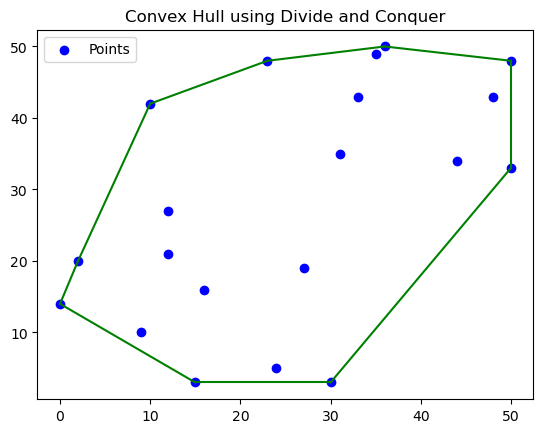

In [3]:
def divide_and_conquer(points):
    # Sort points by x-coordinate
    points = sorted(points)
    
    # Helper function to compute the upper or lower hull
    def construct_hull(points):
        hull = []
        for point in points:
            while len(hull) >= 2 and cross_product(hull[-2], hull[-1], point) <= 0:
                hull.pop()
            hull.append(point)
        return hull
    
    # Divide into upper and lower hull
    upper_hull = construct_hull(points)
    lower_hull = construct_hull(reversed(points))
    
    # Combine upper and lower hull, removing duplicate endpoints
    return upper_hull[:-1] + lower_hull[:-1]

# Example Usage
hull_dc = divide_and_conquer(points)

# Plotting the points and the convex hull
plt.scatter(*zip(*points), label='Points', color='blue')
for i in range(len(hull_dc)):
    p1 = hull_dc[i]
    p2 = hull_dc[(i + 1) % len(hull_dc)]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g-')
plt.title("Convex Hull using Divide and Conquer")
plt.legend()
plt.show()

 # Visualization for Each Algorithm by using dataset Size
* generate random points creates random points in the specified ranges for testing.
* Points are plotted as blue dots and Convex Hull is visualized by connecting the vertices of the hull in sequence.
* Dataset Sizes:
        Small Dataset: 10 points, to verify correctness on small input.
         Medium Dataset: 50 points, to test scalability and correctness.
         Large Dataset: 200 points, to analyze performance and correctness for larger input.
* Visualization for Each Algorithm:
         Graham Scan is plotted in red.
          Divide and Conquer is plotted in green.

Testing Small Dataset (10 points)


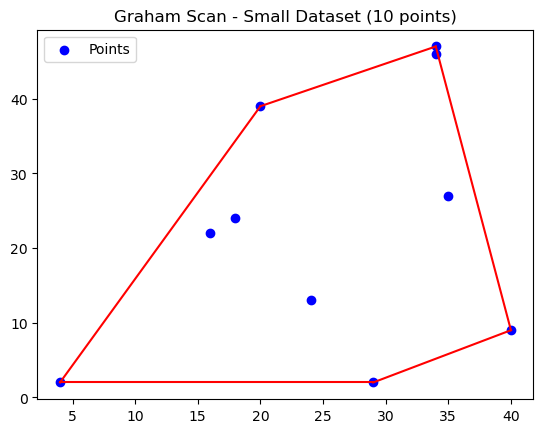

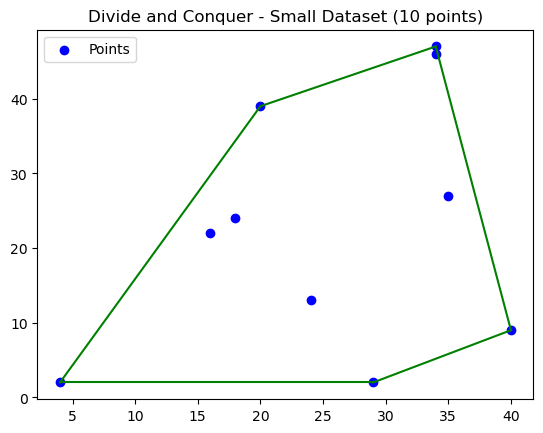

Testing Medium Dataset (50 points)


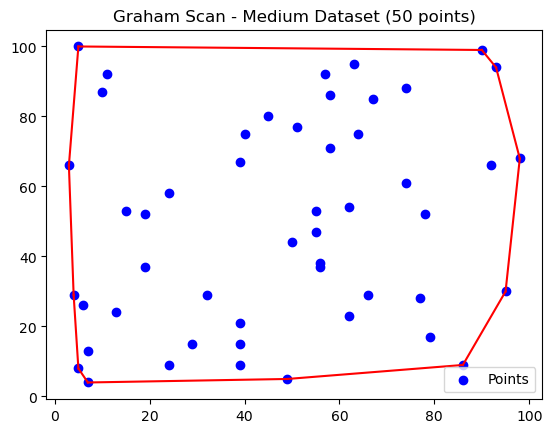

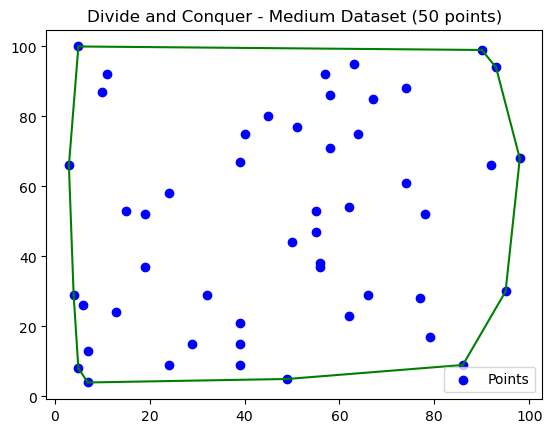

Testing Large Dataset (200 points)


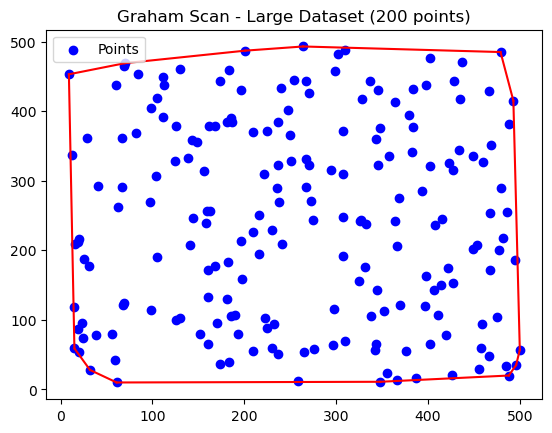

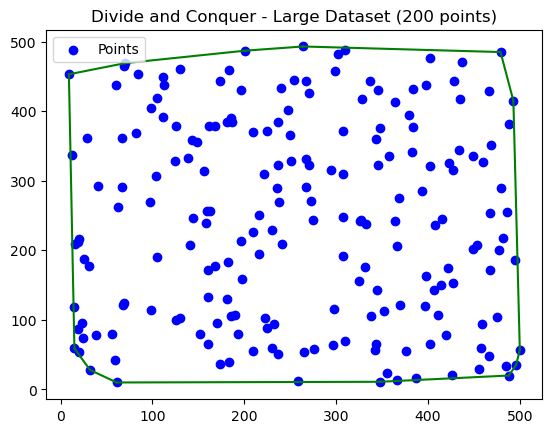

In [4]:
# Function to generate random points
def generate_random_points(n, range_x, range_y):
    return [(random.randint(*range_x), random.randint(*range_y)) for _ in range(n)]

# Function to plot points and their convex hull
def plot_convex_hull(points, hull, title, color='red'):
    plt.scatter(*zip(*points), label='Points', color='blue')
    for i in range(len(hull)):
        p1 = hull[i]
        p2 = hull[(i + 1) % len(hull)]  # Wrap around to the first point
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color=color)
    plt.title(title)
    plt.legend()
    plt.show()

# Testing with Example Datasets
datasets = {
    "Small Dataset (10 points)": generate_random_points(10, (0, 50), (0, 50)),
    "Medium Dataset (50 points)": generate_random_points(50, (0, 100), (0, 100)),
    "Large Dataset (200 points)": generate_random_points(200, (0, 500), (0, 500)),
}

# Test both algorithms on each dataset
for dataset_name, points in datasets.items():
    print(f"Testing {dataset_name}")
    
    # Compute Convex Hull using Graham Scan
    hull_graham = graham_scan(points)
    plot_convex_hull(points, hull_graham, f"Graham Scan - {dataset_name}", color='red')
    
    # Compute Convex Hull using Divide and Conquer
    hull_divide = divide_and_conquer(points)
    plot_convex_hull(points, hull_divide, f"Divide and Conquer - {dataset_name}", color='green')


# Performance Comparison of Convex Hull Algorithms
* The measure_execution_time function tracks the runtime of a given algorithm.
* Both algorithms are tested on the same datasets to ensure fairness.
* Visualization:
       X-axis: Dataset size (number of points).
       Y-axis: Execution time (in seconds).

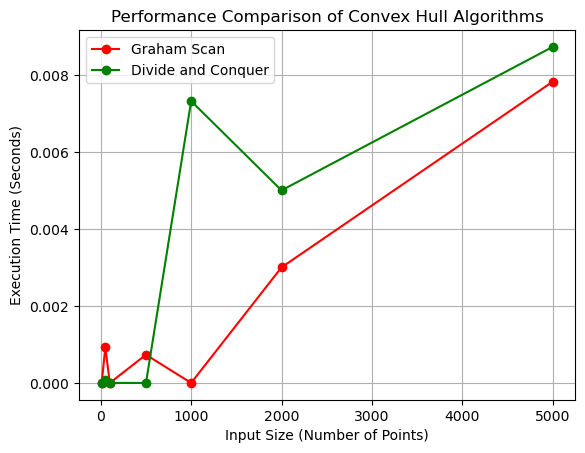

In [5]:
# Measure execution time
def measure_execution_time(algorithm, points):
    start_time = time.time()
    algorithm(points)
    return time.time() - start_time

# Test with increasing dataset sizes
dataset_sizes = [10, 50, 100, 500, 1000, 2000, 5000]
graham_times = []
divide_times = []

for size in dataset_sizes:
    points = generate_random_points(size, (0, 1000), (0, 1000))
    
    # Measure time for Graham Scan
    graham_time = measure_execution_time(graham_scan, points)
    graham_times.append(graham_time)
    
    # Measure time for Divide and Conquer
    divide_time = measure_execution_time(divide_and_conquer, points)
    divide_times.append(divide_time)

# Plot performance comparison
plt.plot(dataset_sizes, graham_times, label='Graham Scan', marker='o', color='red')
plt.plot(dataset_sizes, divide_times, label='Divide and Conquer', marker='o', color='green')
plt.title('Performance Comparison of Convex Hull Algorithms')
plt.xlabel('Input Size (Number of Points)')
plt.ylabel('Execution Time (Seconds)')
plt.legend()
plt.grid(True)
plt.show()


# visualize convex hull comparison
* Generate a random dataset of points.
* Compute convex hulls using both Graham Scan and Divide and Conquer algorithms.
* Visualize the results in one plot, showing how each algorithm defines the convex hull.
* Validate that both algorithms produce the same hull .

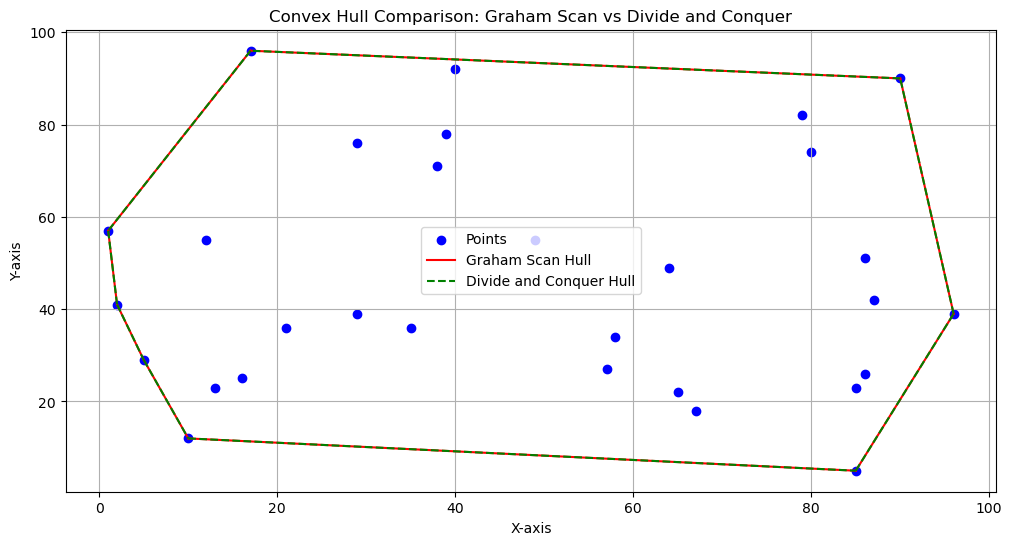

In [6]:
# Generate random points
def generate_random_points(n, range_x, range_y):
    return [(random.randint(*range_x), random.randint(*range_y)) for _ in range(n)]

# Visualization function
def visualize_convex_hull_comparison(points, hull_graham, hull_divide):
    # Overlay both hulls in one plot
    plt.figure(figsize=(12, 6))
    
    # Scatter plot of the points
    plt.scatter(*zip(*points), label='Points', color='blue', zorder=1)
    
    # Graham Scan Hull
    for i in range(len(hull_graham)):
        p1 = hull_graham[i]
        p2 = hull_graham[(i + 1) % len(hull_graham)]
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-', label='Graham Scan Hull' if i == 0 else "", zorder=2)
    
    # Divide and Conquer Hull
    for i in range(len(hull_divide)):
        p1 = hull_divide[i]
        p2 = hull_divide[(i + 1) % len(hull_divide)]
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g--', label='Divide and Conquer Hull' if i == 0 else "", zorder=3)
    
    plt.title("Convex Hull Comparison: Graham Scan vs Divide and Conquer")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate dataset
points = generate_random_points(30, (0, 100), (0, 100))

# Compute hulls
hull_graham = graham_scan(points)
hull_divide = divide_and_conquer(points)

# Visualize comparison
visualize_convex_hull_comparison(points, hull_graham, hull_divide)


# side-by-side comparison
* allows you to directly visualize the convex hulls generated by both algorithms, helping to compare the results and see how each algorithm performs on the same dataset.

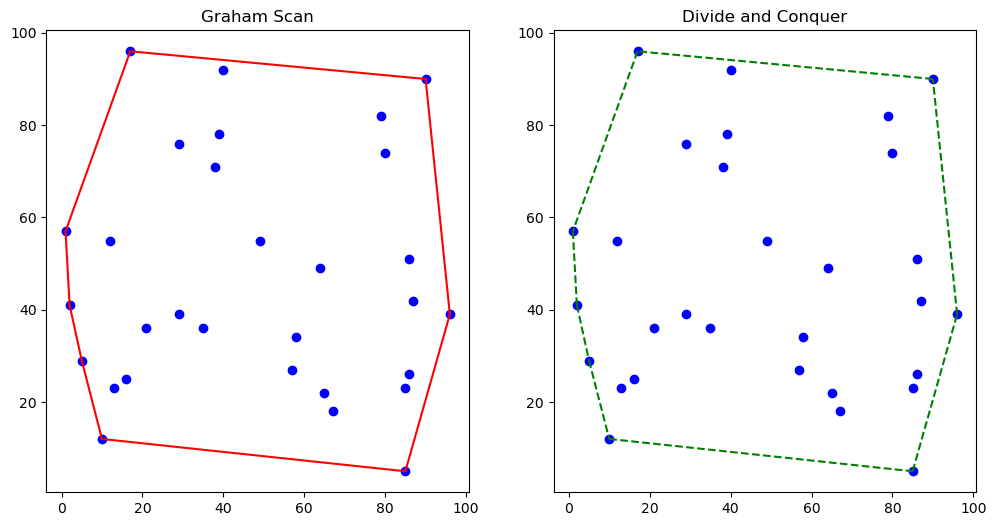

In [7]:
plt.figure(figsize=(12, 6))

# Graham Scan
plt.subplot(1, 2, 1)
plt.scatter(*zip(*points), color='blue')
for i in range(len(hull_graham)):
    p1 = hull_graham[i]
    p2 = hull_graham[(i + 1) % len(hull_graham)]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-')
plt.title("Graham Scan")

# Divide and Conquer
plt.subplot(1, 2, 2)
plt.scatter(*zip(*points), color='blue')
for i in range(len(hull_divide)):
    p1 = hull_divide[i]
    p2 = hull_divide[(i + 1) % len(hull_divide)]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g--')
plt.title("Divide and Conquer")

plt.show()


# Conclusion

    Similarities: 
   * Both Graham Scan and Divide and Conquer produce the correct convex hull in O(n log n) time. They are both efficient for handling large datasets, and they generally give the same result.
    
    Differences:
   * Graham Scan is easier to implement and is more intuitive for many people, as it involves sorting and then performing a linear scan.
    * Divide and Conquer involves a recursive approach and requires more sophisticated merging of hulls. It might introduce overhead from recursion but still maintains O(n log n) complexity.
 
  Which to Choose:
  * For simpler or smaller datasets, Graham Scan might be preferred due to its simplicity and ease of implementation.
   * For larger datasets, Divide and Conquer might be a better choice if you need the recursive structure.